<a href="https://colab.research.google.com/github/workingbetter/Optimisation_Project_2/blob/main/Optimisation_3071806.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Maximising a Function

In [ ]:
import random
import math

def f(x, y, z):
    return (
        math.exp(math.cos(53 * z))
        + math.sin(43 * math.exp(y))
        + math.exp(math.sin(29 * x))
        + math.sin(67 * math.sin(z))
        + math.cos(math.cos(37 * y))
        - (2 * x ** 2 + y ** 2 + z ** 2) / 4
    )

def random_search(steps):
    xb = random.uniform(-1, 1)
    yb = random.uniform(-1, 1)
    zb = random.uniform(-1, 1)
    fbest = f(xb, yb, zb)

    for _ in range(steps):
        xn = random.uniform(-1, 1)
        yn = random.uniform(-1, 1)
        zn = random.uniform(-1, 1)
        fnew = f(xn, yn, zn)

        if fnew > fbest:
            xb = xn
            yb = yn
            zb = zn
            fbest = fnew

    return (xb, yb, zb), fbest

def hill_climbing(steps, sigma=0.1):
    xb = random.uniform(-1, 1)
    yb = random.uniform(-1, 1)
    zb = random.uniform(-1, 1)
    fbest = f(xb, yb, zb)

    for _ in range(steps):
        xn = xb + random.gauss(0, sigma)
        yn = yb + random.gauss(0, sigma)
        zn = zb + random.gauss(0, sigma)
        fnew = f(xn, yn, zn)

        if fnew > fbest:
            xb = xn
            yb = yn
            zb = zn
            fbest = fnew

    return (xb, yb, zb), fbest

# Set the number of runs and steps
num_runs = 50
num_steps = 10000

# Run both algorithms multiple times and collect results
random_search_results = []
hill_climbing_results = []

for _ in range(num_runs):
    random_search_results.append(random_search(num_steps))
    hill_climbing_results.append(hill_climbing(num_steps))

# Find and print the maximum values for both algorithms
random_search_max = max(random_search_results, key=lambda x: x[1])
hill_climbing_max = max(hill_climbing_results, key=lambda x: x[1])

print(f"Number of runs: {num_runs}")
print(f"Number of steps: {num_steps}")

print("Random search:")
print("Maximum value:", random_search_max[1])
print("Best solution: x =", random_search_max[0][0], ", y =", random_search_max[0][1], ", z =", random_search_max[0][2])

print("\nHill climbing:")
print("Maximum value:", hill_climbing_max[1])
print("Best solution: x =", hill_climbing_max[0][0], ", y =", hill_climbing_max[0][1], ", z =", hill_climbing_max[0][2])


Number of runs: 50
Number of steps: 10000
Random search:
Maximum value: 8.351122094311705
Best solution: x = 0.05066574577501859 , y = 0.2977675151748942 , z = 0.11625179596100743

Hill climbing:
Maximum value: 8.326618882846196
Best solution: x = 0.049803241974865624 , y = 0.29915417887546 , z = -0.3577974169445486


# Part 2: Distribution Network

Generation 0: Cost 932.6517849354746
Generation 50: Cost 641.7659245853126
Generation 100: Cost 631.7051005100456
Generation 150: Cost 631.7051005100456
Generation 200: Cost 631.7051005100456
Generation 250: Cost 631.7051005100456
Generation 300: Cost 631.7051005100456
Generation 350: Cost 631.7051005100456
Generation 400: Cost 631.7051005100456
Generation 450: Cost 631.7051005100456
Best Delivery Strategy:
W1: 5, 2, 10, 21, 22, 18, 12, 7, 13, 19, 9, 11, 1
W2: 4, 17, 6, 8, 14, 15, 16, 3, 20, 23

Vehicle Requirements:
W1: 1 vans, 0 lorries
W2: 1 vans, 0 lorries

Routes:
W1 -> van -> 5, 2, 10, 21, 22, 18, 12, 7, 13, 19, 9, 11, 1 -> W1
W2 -> van -> 4, 17, 6, 8, 14, 15, 16, 3, 20, 23 -> W2

Total Cost: £631.7051005100456

Plotting Routes:


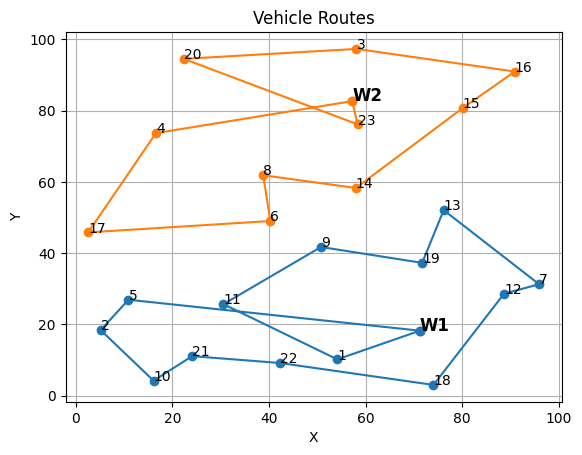

In [3]:
import sys
import math
import random
import heapq
import matplotlib.pyplot as plt
from itertools import chain
from itertools import product

# Constants
WAREHOUSES = ['W1', 'W2']
STORES = [i for i in range(1, 24)]
POPULATION_SIZE = 100
GENERATIONS = 500
MUTATION_RATE = 0.1
VAN_CAPACITY = 4
LORRY_CAPACITY = 16
VAN_COST = 1
LORRY_COST = 2

# Location data
LOCATIONS = {
    1: (54.13917237, 10.16301447),
    2: (5.163117855, 18.37136899),
    3: (58.10773412, 97.325872),
    4: (16.60663876, 73.67529068),
    5: (10.92151473, 26.90262604),
    6: (40.2830426, 49.00596112),
    7: (95.90679501, 31.25379214),
    8: (38.80688537, 61.84963412),
    9: (50.77362816, 41.71229884),
    10: (16.12104517, 4.174152112),
    11: (30.57252604, 25.66416139),
    12: (88.65418483, 28.60340585),
    13: (76.15833298, 52.06010201),
    14: (57.99079029, 58.29016932),
    15: (80.11801005, 80.74242101),
    16: (90.87902761, 90.97690565),
    17: (2.587207522, 45.80849397),
    18: (74.04980053, 2.986131158),
    19: (71.70911665, 37.25817058),
    20: (22.37191714, 94.53074723),
    21: (24.10112206, 11.06658123),
    22: (42.27800052, 9.141860385),
    23: (58.3280586, 76.15907608),
    'W1': (71.25359844, 18.21268482),
    'W2': (57.24219473, 82.66876117),
}



def distance(a, b):
    return math.sqrt((LOCATIONS[a][0] - LOCATIONS[b][0]) ** 2 + (LOCATIONS[a][1] - LOCATIONS[b][1]) ** 2)


def create_individual():
    individual = {warehouse: [] for warehouse in WAREHOUSES}
    
    for store in STORES:
        closest_warehouse = min(WAREHOUSES, key=lambda w: distance(w, store))
        individual[closest_warehouse].append(store)
    
    return individual

def ordered_crossover(parent1, parent2, warehouse):
    # Find crossover points
    start, end = sorted(random.sample(range(len(parent1[warehouse])), 2))
    
    # Initialize child
    child = [None] * len(parent1[warehouse])
    
    # Copy the stores between the crossover points from parent1
    child[start:end+1] = parent1[warehouse][start:end+1]
    
    # Fill the rest of the child with stores from parent2
    p2_stores = (store for store in parent2[warehouse] if store not in child)
    for i in chain(range(start), range(end+1, len(child))):
        child[i] = next(p2_stores)
    
    return child

def calculate_cost(individual):
    summary = route_summary(individual)
    total_cost = 0
    for warehouse, details in summary.items():
        for _, _, _, route_cost in details['routes']:
            total_cost += route_cost
    return total_cost



def crossover(parent1, parent2):
    child = {}
    
    for warehouse in WAREHOUSES:
        if random.random() < 0.5:
            child[warehouse] = ordered_crossover(parent1, parent2, warehouse)
        else:
            child[warehouse] = ordered_crossover(parent2, parent1, warehouse)

    return child



def mutate(individual):
    for warehouse, stores in individual.items():
        if random.random() < MUTATION_RATE:
            a, b = random.sample(range(len(stores)), 2)
            stores[a], stores[b] = stores[b], stores[a]

    return individual



def genetic_algorithm():
    # Initialize the population based on the improved create_individual function
    population = [create_individual() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        population.sort(key=calculate_cost)

        if generation % 50 == 0:
            print(f"Generation {generation}: Cost {calculate_cost(population[0])}")

        new_population = population[:2]  # Elitism

        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = random.sample(population[:10], 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    return population[0]
    




def route_summary(individual):
    summary = {}
    for warehouse, stores in individual.items():
        routes = []

        for i in range(0, len(stores), LORRY_CAPACITY):
            route_stores = stores[i: i + LORRY_CAPACITY]

            van_cost = VAN_COST * (distance(warehouse, route_stores[0]) + distance(route_stores[-1], warehouse))
            for j in range(len(route_stores) - 1):
                van_cost += VAN_COST * distance(route_stores[j], route_stores[j + 1])

            lorry_cost = LORRY_COST * (distance(warehouse, route_stores[0]) + distance(route_stores[-1], warehouse))
            for j in range(len(route_stores) - 1):
                lorry_cost += LORRY_COST * distance(route_stores[j], route_stores[j + 1])

            min_cost = min(van_cost, lorry_cost)

            if van_cost == min_cost:
                routes.append((warehouse, 'van', route_stores, van_cost))
            else:
                routes.append((warehouse, 'lorry', route_stores, lorry_cost))

        summary[warehouse] = {
            'routes': routes,
        }

    return summary



def plot_routes(summary):
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            x = [LOCATIONS[warehouse][0]] + [LOCATIONS[store][0] for store in route_stores] + [LOCATIONS[warehouse][0]]
            y = [LOCATIONS[warehouse][1]] + [LOCATIONS[store][1] for store in route_stores] + [LOCATIONS[warehouse][1]]
            
            plt.plot(x, y, marker='o')
            plt.text(LOCATIONS[warehouse][0], LOCATIONS[warehouse][1], warehouse, fontsize=12, fontweight='bold')
            for store in route_stores:
                plt.text(LOCATIONS[store][0], LOCATIONS[store][1], str(store), fontsize=10)
            
    plt.title("Vehicle Routes")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()


def main():
    best_individual = genetic_algorithm()
    total_cost = calculate_cost(best_individual)
    summary = route_summary(best_individual)



    print("Best Delivery Strategy:")
    for warehouse, stores in best_individual.items():
        print(f"{warehouse}: {', '.join(map(str, stores))}")

    print("\nVehicle Requirements:")
    for warehouse, details in summary.items():
        van_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'van')
        lorry_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'lorry')
        print(f"{warehouse}: {van_count} vans, {lorry_count} lorries")

    print("\nRoutes:")
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            print(f"{warehouse} -> {vehicle_type} -> {', '.join(map(str, route_stores))} -> {warehouse}")

    print(f"\nTotal Cost: £{total_cost}")


    print("\nPlotting Routes:")
    plot_routes(summary)

if __name__ == "__main__":
    main()



Generation 0: Cost 1564.0494676711912
Generation 50: Cost 1035.8116806398434
Generation 100: Cost 1035.8116806398434
Generation 150: Cost 1035.8116806398434
Generation 200: Cost 1035.8116806398434
Generation 250: Cost 1035.8116806398434
Generation 300: Cost 1035.8116806398434
Generation 350: Cost 1035.8116806398434
Generation 400: Cost 1035.8116806398434
Generation 450: Cost 1035.8116806398434
Best Delivery Strategy:
W1: 11, 2, 5, 9, 1, 22, 10, 21, 12, 7, 13, 19, 18
W2: 4, 17, 6, 8, 23, 14, 15, 16, 20, 3

Vehicle Requirements:
W1: 4 vans, 0 lorries
W2: 3 vans, 0 lorries

Routes:
W1 -> van -> 11, 2, 5, 9 -> W1
W1 -> van -> 1, 22, 10, 21 -> W1
W1 -> van -> 12, 7, 13, 19 -> W1
W1 -> van -> 18 -> W1
W2 -> van -> 4, 17, 6, 8 -> W2
W2 -> van -> 23, 14, 15, 16 -> W2
W2 -> van -> 20, 3 -> W2

Total Cost: £1035.8116806398434

Plotting Routes:


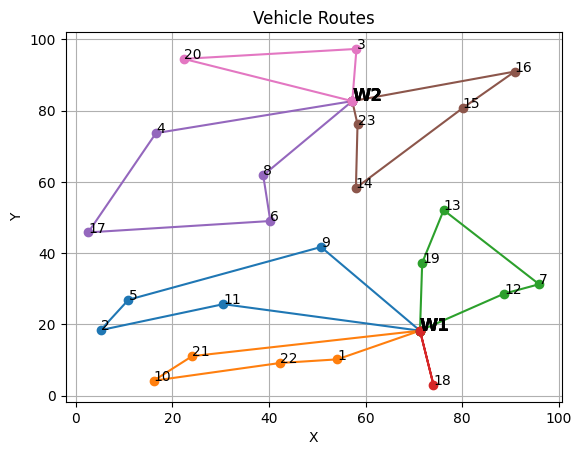

In [10]:
import sys
import math
import random
import heapq
import matplotlib.pyplot as plt
from itertools import chain
from itertools import product

# Constants
WAREHOUSES = ['W1', 'W2']
STORES = [i for i in range(1, 24)]
POPULATION_SIZE = 100
GENERATIONS = 500
MUTATION_RATE = 0.1
VAN_CAPACITY = 4
LORRY_CAPACITY = 16
VAN_COST = 1
LORRY_COST = 2

# Location data
LOCATIONS = {
    1: (54.13917237, 10.16301447),
    2: (5.163117855, 18.37136899),
    3: (58.10773412, 97.325872),
    4: (16.60663876, 73.67529068),
    5: (10.92151473, 26.90262604),
    6: (40.2830426, 49.00596112),
    7: (95.90679501, 31.25379214),
    8: (38.80688537, 61.84963412),
    9: (50.77362816, 41.71229884),
    10: (16.12104517, 4.174152112),
    11: (30.57252604, 25.66416139),
    12: (88.65418483, 28.60340585),
    13: (76.15833298, 52.06010201),
    14: (57.99079029, 58.29016932),
    15: (80.11801005, 80.74242101),
    16: (90.87902761, 90.97690565),
    17: (2.587207522, 45.80849397),
    18: (74.04980053, 2.986131158),
    19: (71.70911665, 37.25817058),
    20: (22.37191714, 94.53074723),
    21: (24.10112206, 11.06658123),
    22: (42.27800052, 9.141860385),
    23: (58.3280586, 76.15907608),
    'W1': (71.25359844, 18.21268482),
    'W2': (57.24219473, 82.66876117),
}



def distance(a, b):
    return math.sqrt((LOCATIONS[a][0] - LOCATIONS[b][0]) ** 2 + (LOCATIONS[a][1] - LOCATIONS[b][1]) ** 2)


def create_individual():
    individual = {warehouse: [] for warehouse in WAREHOUSES}
    
    for store in STORES:
        closest_warehouse = min(WAREHOUSES, key=lambda w: distance(w, store))
        individual[closest_warehouse].append(store)
    
    return individual

def ordered_crossover(parent1, parent2, warehouse):
    # Find crossover points
    start, end = sorted(random.sample(range(len(parent1[warehouse])), 2))
    
    # Initialize child
    child = [None] * len(parent1[warehouse])
    
    # Copy the stores between the crossover points from parent1
    child[start:end+1] = parent1[warehouse][start:end+1]
    
    # Fill the rest of the child with stores from parent2
    p2_stores = (store for store in parent2[warehouse] if store not in child)
    for i in chain(range(start), range(end+1, len(child))):
        child[i] = next(p2_stores)
    
    return child

def calculate_cost(individual):
    summary = route_summary(individual)
    total_cost = 0
    for warehouse, details in summary.items():
        for _, _, _, route_cost in details['routes']:
            total_cost += route_cost
    return total_cost



def crossover(parent1, parent2):
    child = {}
    
    for warehouse in WAREHOUSES:
        if random.random() < 0.5:
            child[warehouse] = ordered_crossover(parent1, parent2, warehouse)
        else:
            child[warehouse] = ordered_crossover(parent2, parent1, warehouse)

    return child



def mutate(individual):
    for warehouse, stores in individual.items():
        if random.random() < MUTATION_RATE:
            a, b = random.sample(range(len(stores)), 2)
            stores[a], stores[b] = stores[b], stores[a]

    return individual



def genetic_algorithm():
    # Initialize the population based on the improved create_individual function
    population = [create_individual() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        population.sort(key=calculate_cost)

        if generation % 50 == 0:
            print(f"Generation {generation}: Cost {calculate_cost(population[0])}")

        new_population = population[:2]  # Elitism

        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = random.sample(population[:10], 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    return population[0]
    



def route_summary(individual):
    summary = {}
    for warehouse, stores in individual.items():
        routes = []

        for i in range(0, len(stores), LORRY_CAPACITY):
            route_stores = stores[i: i + LORRY_CAPACITY]

            van_cost = 0
            lorry_cost = LORRY_COST * (distance(warehouse, route_stores[0]) + distance(route_stores[-1], warehouse))
            for j in range(len(route_stores) - 1):
                lorry_cost += LORRY_COST * distance(route_stores[j], route_stores[j + 1])

            # Calculate the cost of using vans
            for k in range(0, len(route_stores), VAN_CAPACITY):
                sub_route_stores = route_stores[k: k + VAN_CAPACITY]
                van_cost += VAN_COST * (distance(warehouse, sub_route_stores[0]) + distance(sub_route_stores[-1], warehouse))
                for j in range(len(sub_route_stores) - 1):
                    van_cost += VAN_COST * distance(sub_route_stores[j], sub_route_stores[j + 1])

            min_cost = min(van_cost, lorry_cost)

            if min_cost == van_cost:
                for k in range(0, len(route_stores), VAN_CAPACITY):
                    sub_route_stores = route_stores[k: k + VAN_CAPACITY]
                    routes.append((warehouse, 'van', sub_route_stores, min_cost / (len(route_stores) // VAN_CAPACITY)))
            else:
                routes.append((warehouse, 'lorry', route_stores, lorry_cost))

        summary[warehouse] = {
            'routes': routes,
        }

    return summary



def plot_routes(summary):
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            x = [LOCATIONS[warehouse][0]] + [LOCATIONS[store][0] for store in route_stores] + [LOCATIONS[warehouse][0]]
            y = [LOCATIONS[warehouse][1]] + [LOCATIONS[store][1] for store in route_stores] + [LOCATIONS[warehouse][1]]
            
            plt.plot(x, y, marker='o')
            plt.text(LOCATIONS[warehouse][0], LOCATIONS[warehouse][1], warehouse, fontsize=12, fontweight='bold')
            for store in route_stores:
                plt.text(LOCATIONS[store][0], LOCATIONS[store][1], str(store), fontsize=10)
            
    plt.title("Vehicle Routes")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()


def main():
    best_individual = genetic_algorithm()
    total_cost = calculate_cost(best_individual)
    summary = route_summary(best_individual)



    print("Best Delivery Strategy:")
    for warehouse, stores in best_individual.items():
        print(f"{warehouse}: {', '.join(map(str, stores))}")

    print("\nVehicle Requirements:")
    for warehouse, details in summary.items():
        van_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'van')
        lorry_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'lorry')
        print(f"{warehouse}: {van_count} vans, {lorry_count} lorries")

    print("\nRoutes:")
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            print(f"{warehouse} -> {vehicle_type} -> {', '.join(map(str, route_stores))} -> {warehouse}")

    print(f"\nTotal Cost: £{total_cost}")


    print("\nPlotting Routes:")
    plot_routes(summary)

if __name__ == "__main__":
    main()



Generation 0: Cost 1942.5132843576089
Generation 50: Cost 1093.204780414399
Generation 100: Cost 1093.204780414399
Generation 150: Cost 1093.204780414399
Generation 200: Cost 1093.204780414399
Generation 250: Cost 1093.204780414399
Generation 300: Cost 1093.204780414399
Generation 350: Cost 1093.204780414399
Generation 400: Cost 1093.204780414399
Generation 450: Cost 1093.204780414399
Best Delivery Strategy:
W1: 9, 6, 17, 5, 2, 10, 21, 11, 19, 7, 12, 18, 22, 1
W2: 3, 20, 4, 8, 14, 13, 16, 15, 23

Vehicle Requirements:
W1: 0 vans, 1 lorries
W2: 0 vans, 1 lorries

Routes:
W1 -> lorry -> 9, 6, 17, 5, 2, 10, 21, 11, 19, 7, 12, 18, 22, 1 -> W1
W2 -> lorry -> 3, 20, 4, 8, 14, 13, 16, 15, 23 -> W2

Total Cost: £1093.204780414399

Plotting Routes:


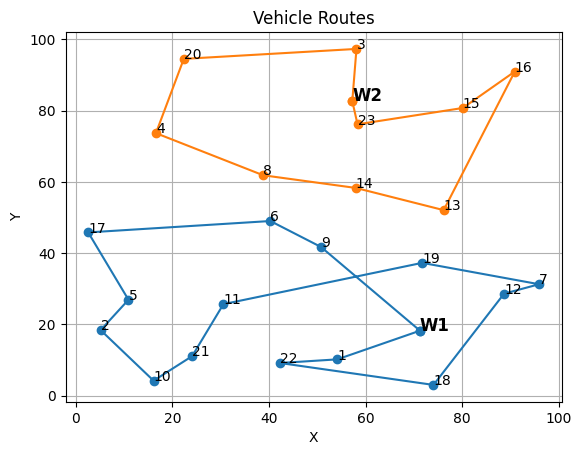

In [14]:

import sys
import math
import random
import heapq
import matplotlib.pyplot as plt
from itertools import chain
from itertools import product
from sklearn.cluster import KMeans
import numpy as np

# Constants
WAREHOUSES = ['W1', 'W2']
STORES = [i for i in range(1, 24)]
POPULATION_SIZE = 100
GENERATIONS = 500
MUTATION_RATE = 0.1
VAN_CAPACITY = 4
LORRY_CAPACITY = 16
VAN_COST = 1
LORRY_COST = 2

# Location data
LOCATIONS = {
    1: (54.13917237, 10.16301447),
    2: (5.163117855, 18.37136899),
    3: (58.10773412, 97.325872),
    4: (16.60663876, 73.67529068),
    5: (10.92151473, 26.90262604),
    6: (40.2830426, 49.00596112),
    7: (95.90679501, 31.25379214),
    8: (38.80688537, 61.84963412),
    9: (50.77362816, 41.71229884),
    10: (16.12104517, 4.174152112),
    11: (30.57252604, 25.66416139),
    12: (88.65418483, 28.60340585),
    13: (76.15833298, 52.06010201),
    14: (57.99079029, 58.29016932),
    15: (80.11801005, 80.74242101),
    16: (90.87902761, 90.97690565),
    17: (2.587207522, 45.80849397),
    18: (74.04980053, 2.986131158),
    19: (71.70911665, 37.25817058),
    20: (22.37191714, 94.53074723),
    21: (24.10112206, 11.06658123),
    22: (42.27800052, 9.141860385),
    23: (58.3280586, 76.15907608),
    'W1': (71.25359844, 18.21268482),
    'W2': (57.24219473, 82.66876117),
}



def distance(a, b):
    return math.sqrt((LOCATIONS[a][0] - LOCATIONS[b][0]) ** 2 + (LOCATIONS[a][1] - LOCATIONS[b][1]) ** 2)



def create_individual():
    # Prepare the store coordinates data for clustering
    store_coordinates = np.array([LOCATIONS[store] for store in STORES])
    
    # Prepare the warehouse coordinates data as initial centroids
    warehouse_coordinates = np.array([LOCATIONS[warehouse] for warehouse in WAREHOUSES])
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=len(WAREHOUSES), init=warehouse_coordinates, n_init=1, random_state=0)
    kmeans.fit(store_coordinates)
    
    # Create the individual by assigning stores to the closest cluster (warehouse)
    individual = {warehouse: [] for warehouse in WAREHOUSES}
    for store, cluster_label in zip(STORES, kmeans.labels_):
        warehouse = WAREHOUSES[cluster_label]
        individual[warehouse].append(store)
    
    return individual


def ordered_crossover(parent1, parent2, warehouse):
    # Find crossover points
    start, end = sorted(random.sample(range(len(parent1[warehouse])), 2))
    
    # Initialize child
    child = [None] * len(parent1[warehouse])
    
    # Copy the stores between the crossover points from parent1
    child[start:end+1] = parent1[warehouse][start:end+1]
    
    # Fill the rest of the child with stores from parent2
    p2_stores = (store for store in parent2[warehouse] if store not in child)
    for i in chain(range(start), range(end+1, len(child))):
        child[i] = next(p2_stores)
    
    return child

def calculate_cost(individual):
    summary = route_summary(individual)
    total_cost = 0
    for warehouse, details in summary.items():
        for _, _, _, route_cost in details['routes']:
            total_cost += route_cost
    return total_cost



def crossover(parent1, parent2):
    child = {}
    
    for warehouse in WAREHOUSES:
        if random.random() < 0.5:
            child[warehouse] = ordered_crossover(parent1, parent2, warehouse)
        else:
            child[warehouse] = ordered_crossover(parent2, parent1, warehouse)

    return child



def mutate(individual):
    for warehouse, stores in individual.items():
        if random.random() < MUTATION_RATE:
            a, b = random.sample(range(len(stores)), 2)
            stores[a], stores[b] = stores[b], stores[a]

    return individual



def genetic_algorithm():
    # Initialize the population based on the improved create_individual function
    population = [create_individual() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        population.sort(key=calculate_cost)

        if generation % 50 == 0:
            print(f"Generation {generation}: Cost {calculate_cost(population[0])}")

        new_population = population[:2]  # Elitism

        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = random.sample(population[:10], 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

    return population[0]
    




def route_summary(individual):
    summary = {}
    for warehouse, stores in individual.items():
        routes = []

        for i in range(0, len(stores), LORRY_CAPACITY):
            route_stores = stores[i: i + LORRY_CAPACITY]

            # Calculate van cost if the route has less or equal stores than van capacity
            if len(route_stores) <= VAN_CAPACITY:
                van_cost = VAN_COST * (distance(warehouse, route_stores[0]) + distance(route_stores[-1], warehouse))
                for j in range(len(route_stores) - 1):
                    van_cost += VAN_COST * distance(route_stores[j], route_stores[j + 1])
            else:
                van_cost = float('inf')

            lorry_cost = LORRY_COST * (distance(warehouse, route_stores[0]) + distance(route_stores[-1], warehouse))
            for j in range(len(route_stores) - 1):
                lorry_cost += LORRY_COST * distance(route_stores[j], route_stores[j + 1])

            min_cost = min(van_cost, lorry_cost)

            if van_cost == min_cost:
                routes.append((warehouse, 'van', route_stores, van_cost))
            else:
                routes.append((warehouse, 'lorry', route_stores, lorry_cost))

        summary[warehouse] = {
            'routes': routes,
        }

    return summary




def plot_routes(summary):
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            x = [LOCATIONS[warehouse][0]] + [LOCATIONS[store][0] for store in route_stores] + [LOCATIONS[warehouse][0]]
            y = [LOCATIONS[warehouse][1]] + [LOCATIONS[store][1] for store in route_stores] + [LOCATIONS[warehouse][1]]
            
            plt.plot(x, y, marker='o')
            plt.text(LOCATIONS[warehouse][0], LOCATIONS[warehouse][1], warehouse, fontsize=12, fontweight='bold')
            for store in route_stores:
                plt.text(LOCATIONS[store][0], LOCATIONS[store][1], str(store), fontsize=10)
            
    plt.title("Vehicle Routes")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()


def main():
    best_individual = genetic_algorithm()
    total_cost = calculate_cost(best_individual)
    summary = route_summary(best_individual)



    print("Best Delivery Strategy:")
    for warehouse, stores in best_individual.items():
        print(f"{warehouse}: {', '.join(map(str, stores))}")

    print("\nVehicle Requirements:")
    for warehouse, details in summary.items():
        van_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'van')
        lorry_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'lorry')
        print(f"{warehouse}: {van_count} vans, {lorry_count} lorries")

    print("\nRoutes:")
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            print(f"{warehouse} -> {vehicle_type} -> {', '.join(map(str, route_stores))} -> {warehouse}")

    print(f"\nTotal Cost: £{total_cost}")


    print("\nPlotting Routes:")
    plot_routes(summary)

if __name__ == "__main__":
    main()



Generation 0: Cost 1692.9349905503507
Generation 50: Cost 1267.4271627633043
Generation 100: Cost 1196.5528567514766
Generation 150: Cost 1135.8288813255265
Generation 200: Cost 1114.7229072693785
Generation 250: Cost 1108.2537705124837
Generation 300: Cost 1106.7830609670937
Generation 350: Cost 1101.9191873328632
Generation 400: Cost 1101.9191873328632
Generation 450: Cost 1101.9191873328632
Best Delivery Strategy:
W1: 12, 7, 13, 19, 18, 10, 2, 1, 16, 23, 20
W2: 14, 9, 6, 11, 22, 21, 5, 17, 4, 8, 15, 3

Vehicle Requirements:
W1: 3 vans, 0 lorries
W2: 0 vans, 1 lorries

Routes:
W1 -> van -> 12, 7, 13, 19 -> W1
W1 -> van -> 18, 10, 2, 1 -> W1
W1 -> van -> 16, 23, 20 -> W1
W2 -> lorry -> 14, 9, 6, 11, 22, 21, 5, 17, 4, 8, 15, 3 -> W2

Total Cost: £1101.9191873328632

Plotting Routes:


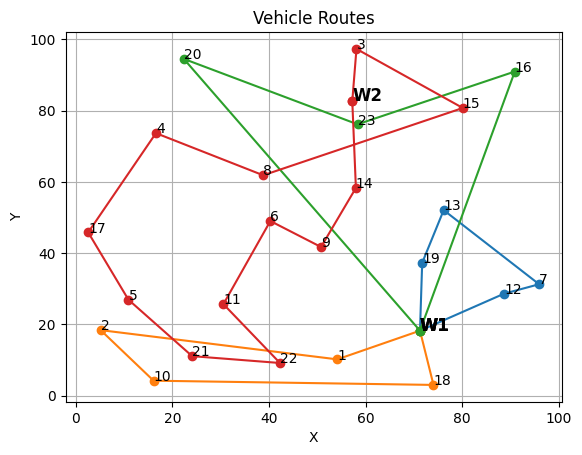

In [15]:
import sys
import math
import random
import heapq
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
from itertools import product

# Constants
WAREHOUSES = ['W1', 'W2']
STORES = [i for i in range(1, 24)]
POPULATION_SIZE = 100
GENERATIONS = 500
MUTATION_RATE = 0.1
VAN_CAPACITY = 4
LORRY_CAPACITY = 16
VAN_COST = 1
LORRY_COST = 2

# Location data
LOCATIONS = {
    1: (54.13917237, 10.16301447),
    2: (5.163117855, 18.37136899),
    3: (58.10773412, 97.325872),
    4: (16.60663876, 73.67529068),
    5: (10.92151473, 26.90262604),
    6: (40.2830426, 49.00596112),
    7: (95.90679501, 31.25379214),
    8: (38.80688537, 61.84963412),
    9: (50.77362816, 41.71229884),
    10: (16.12104517, 4.174152112),
    11: (30.57252604, 25.66416139),
    12: (88.65418483, 28.60340585),
    13: (76.15833298, 52.06010201),
    14: (57.99079029, 58.29016932),
    15: (80.11801005, 80.74242101),
    16: (90.87902761, 90.97690565),
    17: (2.587207522, 45.80849397),
    18: (74.04980053, 2.986131158),
    19: (71.70911665, 37.25817058),
    20: (22.37191714, 94.53074723),
    21: (24.10112206, 11.06658123),
    22: (42.27800052, 9.141860385),
    23: (58.3280586, 76.15907608),
    'W1': (71.25359844, 18.21268482),
    'W2': (57.24219473, 82.66876117),
}

def distance(a, b):
    return math.sqrt((LOCATIONS[a][0] - LOCATIONS[b][0]) ** 2 + (LOCATIONS[a][1] - LOCATIONS[b][1]) ** 2)

def create_individual():
    individual = {warehouse: [] for warehouse in WAREHOUSES}
    
    # Assign stores to warehouses randomly
    for store in STORES:
        warehouse = random.choice(WAREHOUSES)
        individual[warehouse].append(store)
    
    return individual


def ordered_crossover(parent1, parent2, warehouse):
    if not parent1[warehouse] or not parent2[warehouse]:
        return parent1[warehouse] if parent1[warehouse] else parent2[warehouse]

    if len(parent1[warehouse]) == 0:
        return parent2[warehouse]
    if len(parent2[warehouse]) == 0:
        return parent1[warehouse]

    # Find crossover points
    start, end = sorted(random.sample(range(len(parent1[warehouse])), 2))

    # Initialize child
    child = [None] * len(parent1[warehouse])

    # Copy the stores between the crossover points from parent1
    child[start:end+1] = parent1[warehouse][start:end+1]

    # Fill the rest of the child with stores from parent2
    p2_stores = [store for store in parent2[warehouse] if store not in child and store is not None]
    for i in chain(range(start), range(end+1, len(child))):
        if len(p2_stores) > 0:
            child[i] = p2_stores.pop(0)
        else:
            break

    # Filter out None values from the child list
    child = list(filter(None, child))

    return child




def calculate_cost(individual):
    summary = route_summary(individual)
    total_cost = 0
    for warehouse, details in summary.items():
        for _, _, _, route_cost in details['routes']:
            total_cost += route_cost
    return total_cost


def ordered_crossover(parent1, parent2, warehouse):
    if not parent1[warehouse] or not parent2[warehouse]:
        return parent1[warehouse] if parent1[warehouse] else parent2[warehouse]

    if len(parent1[warehouse]) <= 1:
        return parent2[warehouse]
    if len(parent2[warehouse]) <= 1:
        return parent1[warehouse]

    # Find crossover points
    start, end = sorted(random.sample(range(len(parent1[warehouse])), 2))

    # Initialize child
    child = [None] * len(parent1[warehouse])

    # Copy the stores between the crossover points from parent1
    child[start:end+1] = parent1[warehouse][start:end+1]

    # Fill the rest of the child with stores from parent2
    p2_stores = [store for store in parent2[warehouse] if store not in child and store is not None]
    for i in chain(range(start), range(end+1, len(child))):
        if len(p2_stores) > 0:
            child[i] = p2_stores.pop(0)
        else:
            break

    # Filter out None values from the child list
    child = list(filter(None, child))

    return child

def mutate(individual):
    for warehouse, stores in individual.items():
        if random.random() < MUTATION_RATE:
            if len(stores) > 1:
                a, b = random.sample(range(len(stores)), 2)
                stores[a], stores[b] = stores[b], stores[a]

    return individual


def is_valid_individual(individual):
    all_stores = set(STORES)
    individual_stores = set(chain.from_iterable(individual.values()))
    return all_stores == individual_stores


def genetic_algorithm():
    # Initialize the population based on the improved create_individual function
    population = [create_individual() for _ in range(POPULATION_SIZE)]

    for generation in range(GENERATIONS):
        population_costs = [calculate_cost(ind) for ind in population]
        population_fitness = [1 / cost for cost in population_costs]
        total_fitness = sum(population_fitness)
        population_prob = [fitness / total_fitness for fitness in population_fitness]

        if generation % 50 == 0:
            best_individual_index = population_costs.index(min(population_costs))
            print(f"Generation {generation}: Cost {population_costs[best_individual_index]}")

        new_population = []

        # Elitism
        best_individual_indices = heapq.nsmallest(2, range(len(population_costs)), key=population_costs.__getitem__)
        for i in best_individual_indices:
            new_population.append(population[i])

        while len(new_population) < POPULATION_SIZE:
            parent_indices = np.random.choice(POPULATION_SIZE, size=2, p=population_prob, replace=False)
            parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
            child = crossover(parent1, parent2)
            child = mutate(child)
            
            # Check if the child is a valid individual before adding it to the new population
            if is_valid_individual(child):
                new_population.append(child)

        population = new_population

    return population[0]

    

def route_summary(individual):
    summary = {}
    
    # Find the warehouse with the most stores
    warehouse_most_stores = max(individual, key=lambda w: len(individual[w]))

    for warehouse, stores in individual.items():
        routes = []

        # Assign one lorry to the warehouse with the most stores
        if warehouse == warehouse_most_stores:
            route_stores = stores[:LORRY_CAPACITY]
            lorry_cost = LORRY_COST * (distance(warehouse, route_stores[0]) + distance(route_stores[-1], warehouse))
            for j in range(len(route_stores) - 1):
                lorry_cost += LORRY_COST * distance(route_stores[j], route_stores[j + 1])

            routes.append((warehouse, 'lorry', route_stores, lorry_cost))
            stores = stores[LORRY_CAPACITY:]

        # Calculate van routes
        for i in range(0, len(stores), VAN_CAPACITY):
            route_stores = stores[i: i + VAN_CAPACITY]
            van_cost = VAN_COST * (distance(warehouse, route_stores[0]) + distance(route_stores[-1], warehouse))
            for j in range(len(route_stores) - 1):
                van_cost += VAN_COST * distance(route_stores[j], route_stores[j + 1])

            routes.append((warehouse, 'van', route_stores, van_cost))

        summary[warehouse] = {
            'routes': routes,
        }

    return summary






def plot_routes(summary):
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            x = [LOCATIONS[warehouse][0]] + [LOCATIONS[store][0] for store in route_stores] + [LOCATIONS[warehouse][0]]
            y = [LOCATIONS[warehouse][1]] + [LOCATIONS[store][1] for store in route_stores] + [LOCATIONS[warehouse][1]]
            
            plt.plot(x, y, marker='o')
            plt.text(LOCATIONS[warehouse][0], LOCATIONS[warehouse][1], warehouse, fontsize=12, fontweight='bold')
            for store in route_stores:
                plt.text(LOCATIONS[store][0], LOCATIONS[store][1], str(store), fontsize=10)
            
    plt.title("Vehicle Routes")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()


def main():
    best_individual = genetic_algorithm()
    total_cost = calculate_cost(best_individual)
    summary = route_summary(best_individual)



    print("Best Delivery Strategy:")
    for warehouse, stores in best_individual.items():
        print(f"{warehouse}: {', '.join(map(str, stores))}")

    print("\nVehicle Requirements:")
    for warehouse, details in summary.items():
        van_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'van')
        lorry_count = sum(1 for _, vehicle_type, _, _ in details['routes'] if vehicle_type == 'lorry')
        print(f"{warehouse}: {van_count} vans, {lorry_count} lorries")

    print("\nRoutes:")
    for warehouse, details in summary.items():
        for _, vehicle_type, route_stores, _ in details['routes']:
            print(f"{warehouse} -> {vehicle_type} -> {', '.join(map(str, route_stores))} -> {warehouse}")

    print(f"\nTotal Cost: £{total_cost}")


    print("\nPlotting Routes:")
    plot_routes(summary)

if __name__ == "__main__":
    main()

